# Testing

In [ ]:
#from keras.models import load_model
#model = load_model('./assets')
model.load_weights('./model.h5')

test_preds1, test_preds2, test_preds3, test_preds4  = model.predict(x_test)
print(test_preds1.shape)
print(type(test_preds1))
print(test_preds1.dtype)
print('-'*30)
print(test_preds2.shape)
print(type(test_preds2))
print(test_preds2.dtype)
print('-'*30)
print(test_preds3.shape)
print(type(test_preds3))
print(test_preds3.dtype)
print('-'*30)
print(test_preds4.shape)
print(type(test_preds4))
print(test_preds4.dtype)
print('-'*30)

avg_output = tf.keras.layers.Average()([test_preds1, test_preds2, test_preds3, test_preds4])
avg_output = tf.keras.backend.eval(avg_output)
print(avg_output.shape)
print(type(avg_output))
print(avg_output.dtype)
print('-'*30)

In [ ]:
print(type(avg_output))
print(avg_output.shape)
print(avg_output.dtype)
#print(test_preds[0])
imshow(avg_output[0])


In [ ]:
from skimage.io import imshow_collection
imshow_collection(avg_output)
imshow_collection(y_test)

# Evaluating Individual Dice-Co efficient
# Metrics for individual evaluation

In [ ]:
def dice_coef2(a, b):                              
          #  hi = K.hi
          #  hi = hi / 255
    
          #    hi = tf.convert_to_tensor(hi, dtype=None)
          #    pred = tf.convert_to_tensor(test_preds, dtype=None)
    hi = a/255
    pred = b
    hi = K.flatten(hi)
    pred = K.flatten(pred)
    upper_part = 2 * K.sum((hi * pred))
    lower_part = K.sum(hi + pred)
    dice = upper_part / lower_part
    return dice

def jaccard_index2(a, b):
    hi = a/255
    pred = b
    hi = K.flatten(hi)
    pred = K.flatten(pred)
    numerator = K.sum(hi * pred)
    denominator = K.sum((hi + pred) - (hi * pred))
    iou = numerator / denominator
    return iou

In [ ]:
print(y_test[0].dtype)
print(avg_output[0].dtype)
i = y_test[0]
j = avg_output[0]
#i = np.asarray(i).astype(dtype=np.float32)
result = dice_coef2(i,j)
#print(tf.get_static_value(result))
print('Dice Co-efficient: ', result)
result2 = jaccard_index2(i,j)
print('Jaccard-index: ', result2)
x = np.zeros((2, row, columns, 3))
x[0] = i
x[1] = j
imshow_collection(x)

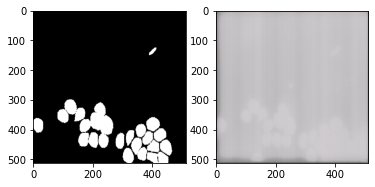

In [ ]:
print(y_test[1].dtype)
print(avg_output[1].dtype)
i = y_test[1]
j = avg_output[1]
#i = np.asarray(i).astype(dtype=np.float32)
result = dice_coef2(i,j)
#print(tf.get_static_value(result))
print('Dice Co-efficient: ', result)
result2 = jaccard_index2(i,j)
print('Jaccard-index: ', result2)
x = np.zeros((2, row, columns, 3))
x[0] = i
x[1] = j
imshow_collection(x)

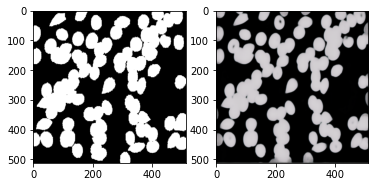

In [ ]:
print(y_test[2].dtype)
print(avg_output[2].dtype)
i = y_test[2]
j = avg_output[2]
#i = np.asarray(i).astype(dtype=np.float32)
result = dice_coef2(i,j)
#print(tf.get_static_value(result))
print('Dice Co-efficient: ', result)
result2 = jaccard_index2(i,j)
print('Jaccard-index: ', result2)
x = np.zeros((2, row, columns, 3))
x[0] = i
x[1] = j
imshow_collection(x)

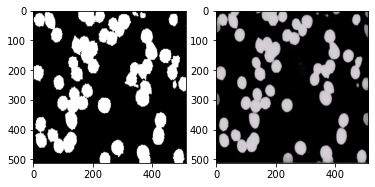

In [ ]:
print(y_test[3].dtype)
print(avg_output[3].dtype)
i = y_test[3]
j = avg_output[3]
#i = np.asarray(i).astype(dtype=np.float32)
result = dice_coef2(i,j)
#print(tf.get_static_value(result))
print('Dice Co-efficient: ', result)
result2 = jaccard_index2(i,j)
print('Jaccard-index: ', result2)
x = np.zeros((2, row, columns, 3))
x[0] = i
x[1] = j
imshow_collection(x)

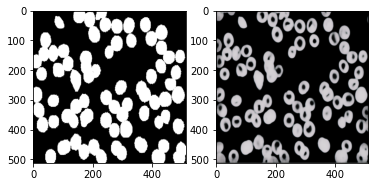

In [ ]:
print(y_test[4].dtype)
print(avg_output[4].dtype)
i = y_test[4]
j = avg_output[4]
#i = np.asarray(i).astype(dtype=np.float32)
result = dice_coef2(i,j)
#print(tf.get_static_value(result))
print('Dice Co-efficient: ', result)
result2 = jaccard_index2(i,j)
print('Jaccard-index: ', result2)
x = np.zeros((2, row, columns, 3))
x[0] = i
x[1] = j
imshow_collection(x)

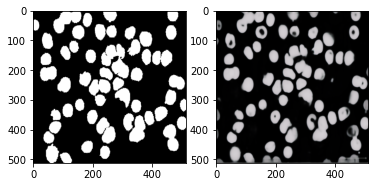

# Average Test Dice Co-efficient, Jaccard index

In [ ]:
#dice_list = np.array(len(test_preds))
#jaccard_list = np.array(len(test_preds))
avg_dice = 0
avg_jaccard = 0
for x in range(len(avg_output)):
    i = y_test[x]
    j = avg_output[x]
    avg_dice = avg_dice + tf.get_static_value(dice_coef2(i,j))
    avg_jaccard = avg_jaccard + tf.get_static_value(jaccard_index2(i,j))
    
#print(dice_list.dtype)
#print(type(dice_list))
#print(dice_list)
#print(jaccard_list)
#avg_dice = tf.get_static_value(K.sum(dice_list)) / tf.get_static_value(tf.size(dice_list))
#avg_jaccard = tf.get_static_value(K.sum(jaccard_list)) / tf.get_static_value(tf.size(jaccard_list))
print('Average Test Dice co-efficent: ', avg_dice/len(avg_output))
print('Average Test Jaccrad Index: ', avg_jaccard/len(avg_output))
    

* Average Test Dice co-efficent:  0.6774925023317337
* Average Test Jaccrad Index:  0.5534521445631981

In [ ]:
history

# Highest & Lowest

In [ ]:
print('Lowest training loss: ',   min(history.history['loss']))
print('Lowest validation loss: ', min(history.history['val_loss']))

print('Lowest training output_1_loss: ',       min(history.history['output_1_loss']))
print('Lowest validation val_output_1_loss: ', min(history.history['val_output_1_loss']))

print('Lowest training output_2_loss: ',       min(history.history['output_2_loss']))
print('Lowest validation val_output_1_loss: ', min(history.history['val_output_1_loss']))

print('Lowest training output_3_loss: ',       min(history.history['output_3_loss']))
print('Lowest validation val_output_3_loss: ', min(history.history['val_output_3_loss']))

print('Lowest training output_4_loss: ',       min(history.history['output_4_loss']))
print('Lowest validation val_output_4_loss: ', min(history.history['val_output_4_loss']))

print('Lowest training output_1_dice_coef: ',           max(history.history['output_1_dice_coef']))
print('Lowest validation val_output_1_dice_coef: ',     max(history.history['val_output_1_dice_coef']))
#output_1_dice_coef
print('Lowest training output_2_dice_coef: ',           max(history.history['output_2_dice_coef']))
print('Lowest validation val_output_2_dice_coef: ',     max(history.history['val_output_2_dice_coef']))

print('Lowest training output_3_dice_coef: ',           max(history.history['output_3_dice_coef']))
print('Lowest validation val_output_3_dice_coef: ',     max(history.history['val_output_3_dice_coef']))

print('Lowest training output_4_dice_coef: ',           max(history.history['output_4_dice_coef']))
print('Lowest validation val_output_4_dice_coef: ',     max(history.history['val_output_4_dice_coef']))

print('Lowest training output_1_jaccard_index: ',           max(history.history['output_1_jaccard_index']))
print('Lowest validation val_output_1_jaccard_index: ',     max(history.history['val_output_1_jaccard_index']))

print('Lowest training output_2_jaccard_index: ',           max(history.history['output_2_jaccard_index']))
print('Lowest validation val_output_2_jaccard_index: ',     max(history.history['val_output_2_jaccard_index']))

print('Lowest training output_3_jaccard_index: ',           max(history.history['output_3_jaccard_index']))
print('Lowest validation val_output_3_jaccard_index: ',     max(history.history['val_output_3_jaccard_index']))

print('Lowest training output_4_jaccard_index: ',           max(history.history['output_4_jaccard_index']))
print('Lowest validation val_output_4_jaccard_index: ',     max(history.history['val_output_4_jaccard_index']))

#print('Highest training dice coefficient: ', max(history.history['dice_coef']))
#print('Highest validation dice coefficient: ', max(history.history['val_dice_coef']))
#print('Highest training jaccrad index: ', max(history.history['jaccard_index']))
#print('Highest validation jaccard index: ', max(history.history['val_jaccard_index']))

* Lowest training loss:  0.5291943550109863
* Lowest validation loss:  1.6442148685455322
* Lowest training output_1_loss:  0.16780215501785278
* Lowest validation val_output_1_loss:  0.4067637324333191
* Lowest training output_2_loss:  0.1421235054731369
* Lowest validation val_output_1_loss:  0.4067637324333191
* Lowest training output_3_loss:  0.1134997233748436
* Lowest validation val_output_3_loss:  0.3834807872772217
* Lowest training output_4_loss:  0.10170267522335052
* Lowest validation val_output_4_loss:  0.30409789085388184
* Lowest training output_1_dice_coef:  0.8458636999130249
* Lowest validation val_output_1_dice_coef:  0.7192533016204834
* Lowest training output_2_dice_coef:  0.8698706030845642
* Lowest validation val_output_2_dice_coef:  0.8059002161026001
* Lowest training output_3_dice_coef:  0.8921957612037659
* Lowest validation val_output_3_dice_coef:  0.8283144235610962
* Lowest training output_4_dice_coef:  0.8972145318984985
* Lowest validation val_output_4_dice_coef:  0.8174987435340881
* Lowest training output_1_jaccard_index:  0.7357960939407349
* Lowest validation val_output_1_jaccard_index:  0.5665613412857056
* Lowest training output_2_jaccard_index:  0.7718052864074707
* Lowest validation val_output_2_jaccard_index:  0.6826576590538025
* Lowest training output_3_jaccard_index:  0.8059954047203064
* Lowest validation val_output_3_jaccard_index:  0.715369462966919
* Lowest training output_4_jaccard_index:  0.8145710229873657
* Lowest validation val_output_4_jaccard_index:  0.6975379586219788

In [ ]:
'''
from keras import backend as K
from keras.layers import concatenate, Conv2DTranspose, Activation
from keras.layers import BatchNormalization


from keras.layers import Conv2D, Input, AvgPool2D
from keras.models import Model

dropout_rate = 0.5

#input_shape = (512, 512, 3)
#n_labels    = 3

def conv_batchnorm_relu_block(input_tensor, nb_filter, kernel_size=3):

    x = Conv2D(nb_filter, (kernel_size, kernel_size), padding='same')(input_tensor)
    x = BatchNormalization(axis=2)(x)
    x = Activation('relu')(x)

    return x


def model_build_func(input_shape, n_labels, using_deep_supervision=False):

    nb_filter = [32,64,128,256,512]

    # Set image data format to channels first
    global bn_axis

    K.set_image_data_format("channels_last")
    bn_axis = -1
    inputs = Input(shape=input_shape, name='input_image')

    conv1_1 = conv_batchnorm_relu_block(inputs, nb_filter=nb_filter[0])
    pool1 = AvgPool2D((2, 2), strides=(2, 2), name='pool1')(conv1_1)

    conv2_1 = conv_batchnorm_relu_block(pool1, nb_filter=nb_filter[1])
    pool2 = AvgPool2D((2, 2), strides=(2, 2), name='pool2')(conv2_1)

    up1_2 = Conv2DTranspose(nb_filter[0], (2, 2), strides=(2, 2), name='up12', padding='same')(conv2_1)
    conv1_2 = concatenate([up1_2, conv1_1], name='merge12', axis=bn_axis)
    conv1_2 = conv_batchnorm_relu_block(conv1_2,  nb_filter=nb_filter[0])

    conv3_1 = conv_batchnorm_relu_block(pool2, nb_filter=nb_filter[2])
    pool3 = AvgPool2D((2, 2), strides=(2, 2), name='pool3')(conv3_1)

    up2_2 = Conv2DTranspose(nb_filter[1], (2, 2), strides=(2, 2), name='up22', padding='same')(conv3_1)
    conv2_2 = concatenate([up2_2, conv2_1], name='merge22', axis=bn_axis)
    conv2_2 = conv_batchnorm_relu_block(conv2_2, nb_filter=nb_filter[1])

    up1_3 = Conv2DTranspose(nb_filter[0], (2, 2), strides=(2, 2), name='up13', padding='same')(conv2_2)
    conv1_3 = concatenate([up1_3, conv1_1, conv1_2], name='merge13', axis=bn_axis)
    conv1_3 = conv_batchnorm_relu_block(conv1_3, nb_filter=nb_filter[0])

    conv4_1 = conv_batchnorm_relu_block(pool3, nb_filter=nb_filter[3])
    pool4 = AvgPool2D((2, 2), strides=(2, 2), name='pool4')(conv4_1)

    up3_2 = Conv2DTranspose(nb_filter[2], (2, 2), strides=(2, 2), name='up32', padding='same')(conv4_1)
    conv3_2 = concatenate([up3_2, conv3_1], name='merge32', axis=bn_axis)
    conv3_2 = conv_batchnorm_relu_block(conv3_2, nb_filter=nb_filter[2])

    up2_3 = Conv2DTranspose(nb_filter[1], (2, 2), strides=(2, 2), name='up23', padding='same')(conv3_2)
    conv2_3 = concatenate([up2_3, conv2_1, conv2_2], name='merge23', axis=bn_axis)
    conv2_3 = conv_batchnorm_relu_block(conv2_3, nb_filter=nb_filter[1])

    up1_4 = Conv2DTranspose(nb_filter[0], (2, 2), strides=(2, 2), name='up14', padding='same')(conv2_3)
    conv1_4 = concatenate([up1_4, conv1_1, conv1_2, conv1_3], name='merge14', axis=bn_axis)
    conv1_4 = conv_batchnorm_relu_block(conv1_4, nb_filter=nb_filter[0])

    conv5_1 = conv_batchnorm_relu_block(pool4, nb_filter=nb_filter[4])

    up4_2 = Conv2DTranspose(nb_filter[3], (2, 2), strides=(2, 2), name='up42', padding='same')(conv5_1)
    conv4_2 = concatenate([up4_2, conv4_1], name='merge42', axis=bn_axis)
    conv4_2 = conv_batchnorm_relu_block(conv4_2, nb_filter=nb_filter[3])

    up3_3 = Conv2DTranspose(nb_filter[2], (2, 2), strides=(2, 2), name='up33', padding='same')(conv4_2)
    conv3_3 = concatenate([up3_3, conv3_1, conv3_2], name='merge33', axis=bn_axis)
    conv3_3 = conv_batchnorm_relu_block(conv3_3, nb_filter=nb_filter[2])

    up2_4 = Conv2DTranspose(nb_filter[1], (2, 2), strides=(2, 2), name='up24', padding='same')(conv3_3)
    conv2_4 = concatenate([up2_4, conv2_1, conv2_2, conv2_3], name='merge24', axis=bn_axis)
    conv2_4 = conv_batchnorm_relu_block(conv2_4, nb_filter=nb_filter[1])

    up1_5 = Conv2DTranspose(nb_filter[0], (2, 2), strides=(2, 2), name='up15', padding='same')(conv2_4)
    conv1_5 = concatenate([up1_5, conv1_1, conv1_2, conv1_3, conv1_4], name='merge15', axis=bn_axis)
    conv1_5 = conv_batchnorm_relu_block(conv1_5, nb_filter=nb_filter[0])

    nestnet_output_1 = Conv2D(n_labels, (1, 1), activation='sigmoid', name='output_1',padding='same')(conv1_2)
    nestnet_output_2 = Conv2D(n_labels, (1, 1), activation='sigmoid', name='output_2', padding='same' )(conv1_3)
    nestnet_output_3 = Conv2D(n_labels, (1, 1), activation='sigmoid', name='output_3', padding='same')(conv1_4)
    nestnet_output_4 = Conv2D(n_labels, (1, 1), activation='sigmoid', name='output_4', padding='same')(conv1_5)

    if using_deep_supervision==True:
        model = Model(inputs=inputs, outputs=[nestnet_output_1,
                                            nestnet_output_2,
                                            nestnet_output_3,
                                            nestnet_output_4])
    else:
        model = Model(inputs=inputs, outputs=nestnet_output_4)
    
    lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.5,
    staircase=True)
    
    opt = keras.optimizers.Adam(learning_rate=0.001)

    #model.compile(optimizer='adam', loss='binary_crossentropy')
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    #dice_coef, jaccard_index

    return model
'''

In [ ]:
'''
input_shape = (512,512,3)
n_labels = 3
model = model_build_func(input_shape, n_labels)
model.summary()
'''